In [1]:
import pandas as pd

data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")

In [2]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 65 columns):
RespondentID                                                                                                                                    1058 non-null int64
Do you celebrate Thanksgiving?                                                                                                                  1058 non-null object
What is typically the main dish at your Thanksgiving dinner?                                                                                    974 non-null object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)                                                           35 non-null object
How is the main dish typically cooked?                                                                                                          974 non-null object
How is the main dish typically cooked? - Other (please specify)          

In [4]:
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [5]:
data = data[data["Do you celebrate Thanksgiving?"] == "Yes"]

In [6]:
data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [7]:
data[data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"]["Do you typically have gravy?"]

4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

In [8]:
apple_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])

In [9]:
pumpkin_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"])

In [10]:
pecan_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"])

In [11]:
ate_pies = apple_isnull & pumpkin_isnull & pecan_isnull

In [12]:
ate_pies.value_counts()

False    876
True     104
dtype: int64

In [13]:
def convertToInt(ageRange):
    if pd.isnull(ageRange):
        return None
    ageRange = ageRange.split(" ")
    age = ageRange[0]
    if age.endswith("+"):
        age = age[0:-1]
    return int(age)

In [14]:
data["int_age"] = data["Age"].apply(convertToInt)

In [15]:
data["int_age"].describe()

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64

## Findings

Majority of people it turkey at thanksgiving dinner. Also, the age groups
of respondents are evenly distributed.

# Converting Income to Numeric

In [16]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      166
$50,000 to $74,999      127
$75,000 to $99,999      127
Prefer not to answer    118
$100,000 to $124,999    109
$200,000 and up          76
$10,000 to $24,999       60
$0 to $9,999             52
$125,000 to $149,999     48
$150,000 to $174,999     38
$175,000 to $199,999     26
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [17]:
def incomeNumeric(income):
    if pd.isnull(income):
        return None
    income = income.split(" ")
    income = income[0]
    
    if income == "Prefer":
        return None
    
    income = income.replace("$", "")
    income = income.replace(",", "")
    return int(income)

In [18]:
data["int_income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(
    incomeNumeric)
data["int_income"].describe()

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

## Findings

Average income is fairly high with a large standard deviation.

# Correlating Travel Distance and Income

In [19]:
people_under_150000 = data[data["int_income"] < 150000]
people_under_150000["How far will you travel for Thanksgiving?"].value_counts().plot.pie(figsize=(6, 6))

In [20]:
people_over_150000 = data[data["int_income"] > 150000]
people_over_150000["How far will you travel for Thanksgiving?"].value_counts().plot.pie(figsize=(6, 6))

# Correlating Travel Distance and Age

In [21]:
data["How far will you travel for Thanksgiving?"].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         396
Thanksgiving is local--it will take place in the town I live in                     276
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    197
Thanksgiving is out of town and far away--I have to drive several hours or fly       82
Name: How far will you travel for Thanksgiving?, dtype: int64

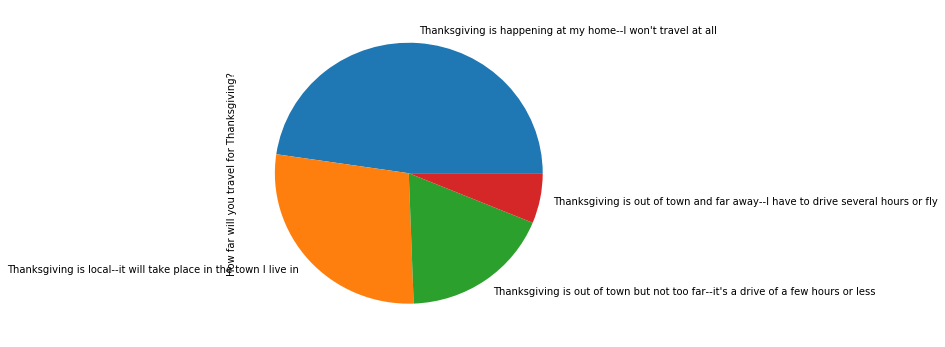

In [22]:
%matplotlib inline

age_60_above = data[data["int_age"] == 60.0]["How far will you travel for Thanksgiving?"]
age_60_above.value_counts().plot.pie(figsize=(6, 6))

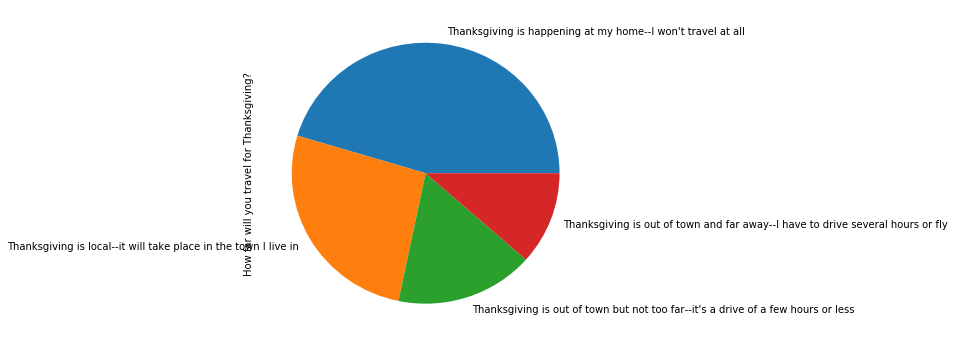

In [23]:
age_45_to_60 = data[data["int_age"] == 45.0]["How far will you travel for Thanksgiving?"]
age_45_to_60.value_counts().plot.pie(figsize=(6, 6))

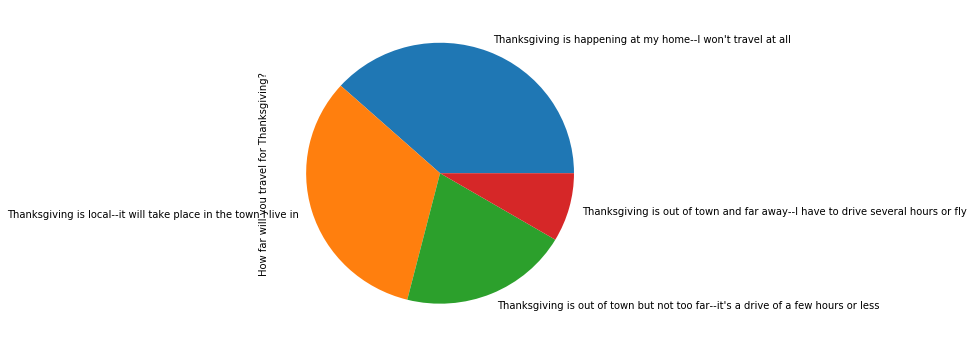

In [24]:
age_30_to_45 = data[data["int_age"] == 30.0]["How far will you travel for Thanksgiving?"]
age_30_to_45.value_counts().plot.pie(figsize=(6, 6))

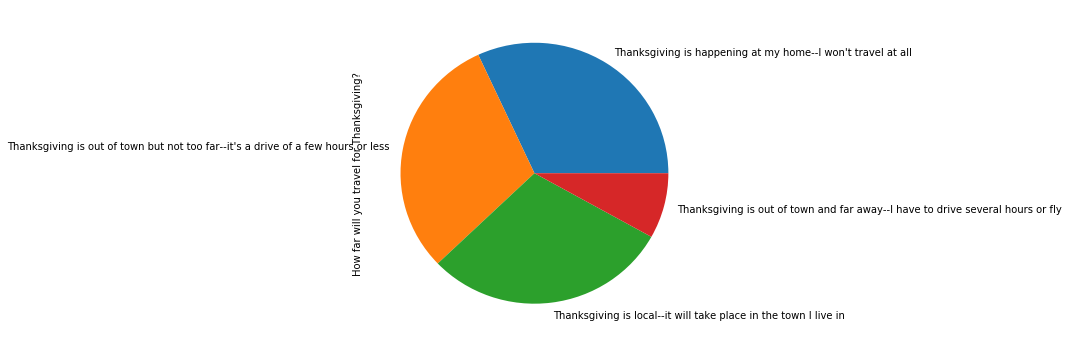

In [25]:
age_18_to_30 = data[data["int_age"] == 18.0]["How far will you travel for Thanksgiving?"]
age_18_to_30.value_counts().plot.pie(figsize=(6, 6))

# Linking Friendship and Age

In [26]:
pd.pivot_table(
    data, 
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_age")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [27]:
pd.pivot_table(
    data, 
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_income")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


## Findings

Younger people are more likely to meet up with hometown friends, and attend a Friendsgiving.